# SAT & ACT Participation Analysis: EDA
***

### Contents:
- [Summary Statistics](#Summary-Statistics)
- [Investigate Trends in the Data](#Investigate-Trends-in-the-Data)
- [Plot the Data](#Plot-the-Data)
- [Summarize Distributions](#Summarize-Distributions)

*Import Libraries*

In [1]:
import numpy as np          
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline

#### Read In SAT & ACT  Data

Read in the `final.csv` and assign to a dataframe.

In [2]:
# Read in the final data
final = pd.read_csv('../data/final.csv')

In [3]:
# Look at the first 5 rows of the data
final.head()

,state,2017_sat_participation,2017_sat_ebrw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [4]:
# Check datatypes of each column
final.dtypes

state                      object
2017_sat_participation    float64
2017_sat_ebrw               int64
2017_sat_math               int64
2017_sat_total              int64
2017_act_participation    float64
2017_act_english          float64
2017_act_math             float64
2017_act_reading          float64
2017_act_science          float64
2017_act_composite        float64
2018_sat_participation    float64
2018_sat_ebrw               int64
2018_sat_math               int64
2018_sat_total              int64
2018_act_participation    float64
2018_act_composite        float64
dtype: object

## Summary Statistics

In [5]:
# Tranposing the output of pandas describe method
final.describe().T

,count,mean,std,min,25%,50%,75%,max
2017_sat_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
2017_sat_ebrw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
2017_sat_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
2017_sat_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
2017_act_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
2017_act_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
2017_act_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
2017_act_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
2017_act_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
2017_act_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


Observations:
-  Participation rates for both tests cover a wide range

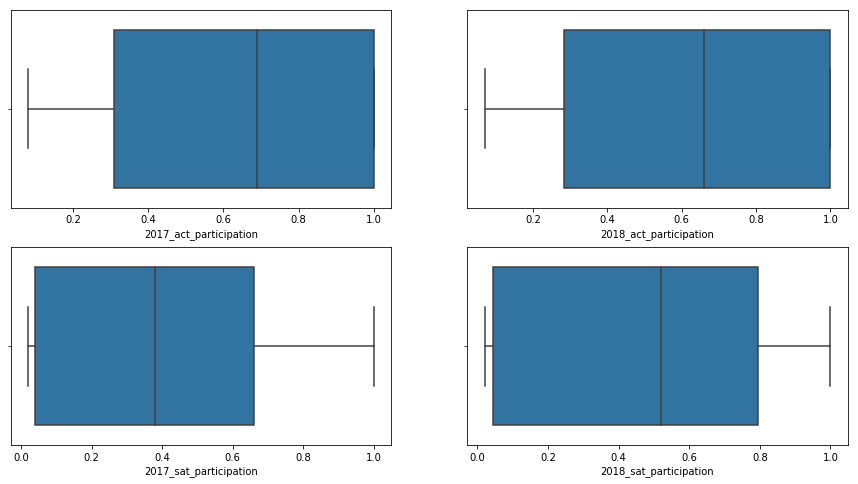

In [6]:
# Looking at the distribtion of participation rates
# Reference: code modified from notes from David Yerrington's Class on 3/4 (Intro to Pandas Part 1)
fig, ax = plt.subplots(
    nrows    = 2,
    ncols    = 2,
    figsize  = (15, 8)
)
sns.boxplot(final['2017_act_participation'], ax = ax[0, 0])
sns.boxplot(final['2018_act_participation'], ax = ax[0, 1])
sns.boxplot(final['2017_sat_participation'], ax = ax[1, 0])
sns.boxplot(final['2018_sat_participation'], ax = ax[1, 1]);

#### Equation for Standard Deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$


In [7]:
# Function to calculate standard deviation based on equation above
def std_dev(df, column_name):
    total = 0
    
    # step 1: (current value - mean)**2 (do for all values in column and add together)
    for value in df[column_name]:
        diff_sq = (value - df[column_name].mean()) ** 2
        total += diff_sq
        
    # step 2: divide by n and then take square root
    stdev = ( total / ( df[column_name].count() ) ) ** 0.5
    
    return stdev

In [8]:
# Using a dictionary comprehension to apply my standard deviation function to each numeric column in the DataFrame
sd = {col_name: std_dev(final, col_name) for col_name in final.columns[1:]}
sd

{'2017_sat_participation': 0.3492907076664507,
 '2017_sat_ebrw': 45.21697020437866,
 '2017_sat_math': 46.65713364485503,
 '2017_sat_total': 91.58351056778743,
 '2017_act_participation': 0.3182417575123181,
 '2017_act_english': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_reading': 2.0469029314842646,
 '2017_act_science': 1.7222161451443676,
 '2017_act_composite': 2.000786081581989,
 '2018_sat_participation': 0.3763965409204987,
 '2018_sat_ebrw': 44.87118561762388,
 '2018_sat_math': 48.40589946919447,
 '2018_sat_total': 92.94372462792965,
 '2018_act_participation': 0.33745194881997503,
 '2018_act_composite': 2.0968220768561987}

In [9]:
# Testing function to see if standard deviation mathces for '2017_act_participation'
print("My Standard Deviation:          ", std_dev(final, '2017_act_participation'))
print("Numpys Standard Deviation:      ", np.std(final['2017_act_participation']))
print("pd.describe Standard Deviation: ", final['2017_act_participation'].describe().T['std'])

My Standard Deviation:           0.3182417575123181
Numpys Standard Deviation:       0.3182417575123181
pd.describe Standard Deviation:  0.32140842015886834


Observation: Manual and Numpy's standard deviation method are returning the same number - but slightly different than pandas describe

## Investigate Trends in the Data

#### Find Highest/Lowest Participation Rates - SAT

In [10]:
# 2017 SAT Participation
sat_part_2017 = final.copy()[['state', '2017_sat_participation']]
# Lowest
print(sat_part_2017.sort_values(by='2017_sat_participation').head())
# Highest
print(sat_part_2017.sort_values(by='2017_sat_participation').tail())

           state  2017_sat_participation
34  North Dakota                    0.02
24   Mississippi                    0.02
15          Iowa                    0.02
25      Missouri                    0.03
44          Utah                    0.03
                   state  2017_sat_participation
29         New Hampshire                    0.96
22              Michigan                    1.00
8   District of Columbia                    1.00
7               Delaware                    1.00
6            Connecticut                    1.00


*  2017 SAT Lowest Participation: North Dakota, Mississippi, Iowa (2%)
    - States with relatively smaller populations
*  2017 SAT Highest Particpation: Michigan, DC, Delaware, Connecticut (100%)
    - Why is there 100% participation?

In [11]:
# 2018 SAT Participation
sat_part_2018 = final.copy()[['state', '2018_sat_participation']]
# Lowest
print(sat_part_2018.sort_values(by='2018_sat_participation').head()) 
# Highest
print(sat_part_2018.sort_values(by='2018_sat_participation').tail(6)) 

           state  2018_sat_participation
34  North Dakota                    0.02
50       Wyoming                    0.03
41  South Dakota                    0.03
27      Nebraska                    0.03
49     Wisconsin                    0.03
          state  2018_sat_participation
13     Illinois                    0.99
5      Colorado                    1.00
6   Connecticut                    1.00
7      Delaware                    1.00
22     Michigan                    1.00
12        Idaho                    1.00


*  2018 SAT Lowest Participation: North Dakota (2%
    - Mississippi and Iowa are no longer in the bottom 5 in terms of SAT participation
*  2018 SAT Highest Particpation: Idaho, Michigan, Delaware, Connecticut, Colorado(100%)
    - DC fell out of the highest participation top states
    - Idaho, Colorado and Illinois are new to the top 5

#### Find Highest/Lowest Participation Rates - ACT

In [12]:
# 2017 ACT Participation
act_part_2017 = final.copy()[['state', '2017_act_participation']]
# Lowest
print(act_part_2017.sort_values(by='2017_act_participation').head())
# Highest
print(act_part_2017.sort_values(by='2017_act_participation').tail(18))

            state  2017_act_participation
19          Maine                    0.08
29  New Hampshire                    0.18
7        Delaware                    0.18
39   Rhode Island                    0.21
38   Pennsylvania                    0.23
             state  2017_act_participation
34    North Dakota                    0.98
40  South Carolina                    1.00
44            Utah                    1.00
42       Tennessee                    1.00
0          Alabama                    1.00
25        Missouri                    1.00
33  North Carolina                    1.00
28          Nevada                    1.00
26         Montana                    1.00
49       Wisconsin                    1.00
24     Mississippi                    1.00
23       Minnesota                    1.00
18       Louisiana                    1.00
17        Kentucky                    1.00
5         Colorado                    1.00
3         Arkansas                    1.00
36        Oklahom

*  2017 ACT Lowest Participation: Maine (8%), Delaware (18%), New Hampshire (18%)
    - Delaware was on the highest for SAT and lowest for ACT
*  2017 ACT Highest Particpation: 17 States with 100% - Wyoming, Oklahoma, Arkansas, Colorado, Kentucky, Lousiana, Minnesota, Mississippi, Wisconsin, Montana, Nevada, North Carolina, Missouri, Alabama, Tennessee, Utah, South Carolina
    - Many more states with 100% participation than SAT
    - Most of these states are in the middle of the USA

In [13]:
# 2018 ACT Participation
act_part_2018 = final.copy()[['state', '2018_act_participation']]
# Lowest
print(act_part_2018.sort_values(by='2018_act_participation').head())
# Highest
print(act_part_2018.sort_values(by='2018_act_participation').tail(18))

            state  2018_act_participation
19          Maine                    0.07
39   Rhode Island                    0.15
29  New Hampshire                    0.16
7        Delaware                    0.17
38   Pennsylvania                    0.20
             state  2018_act_participation
23       Minnesota                    0.99
44            Utah                    1.00
42       Tennessee                    1.00
40  South Carolina                    1.00
0          Alabama                    1.00
25        Missouri                    1.00
35            Ohio                    1.00
33  North Carolina                    1.00
28          Nevada                    1.00
27        Nebraska                    1.00
26         Montana                    1.00
49       Wisconsin                    1.00
24     Mississippi                    1.00
18       Louisiana                    1.00
17        Kentucky                    1.00
3         Arkansas                    1.00
36        Oklahom

*  2018 ACT Lowest Participation: Maine (7%), Rhode Island (15%), New Hampshire (16%), Delaware (17%)
    - States remain pretty consistent in this category
*  2018 ACT Highest Particpation: 17 States with 100% - Wyoming, Oklahoma, Arkansas, Kentucky, Lousiana, Mississippi, Wisconsin, Montana, Nebraska, Nevada, North Carolina, Missouri, Alabama, South Carolina, Tennessee, Utah
    - States remain pretty consistent in this category as well, other than the loss of Colorado

#### Find Highest/Lowest Scores - SAT

In [14]:
# 2017 SAT Scores
sat_total_2017 = final.copy()[['state', '2017_sat_total']]
# Lowest 5
print(sat_total_2017.sort_values(by='2017_sat_total').head())
# Highest 5=
print(sat_total_2017.sort_values(by='2017_sat_total').tail()) 

                   state  2017_sat_total
8   District of Columbia             950
7               Delaware             996
12                 Idaho            1005
22              Michigan            1005
19                 Maine            1012
        state  2017_sat_total
16     Kansas            1260
25   Missouri            1271
15       Iowa            1275
49  Wisconsin            1291
23  Minnesota            1295


*  2017 SAT Lowest Total: DC, Delaware, Idaho, Michigan, Maine
    - States with high participation are falling into the lowest score category
*  2017 SAT Highest Total: Minnesota, Wisconsin, Iowa, Missouri, Kansas
    - States with low participationa are falling into the highest score category

In [15]:
# 2018 SAT Scores
sat_total_2018 = final.copy()[['state', '2018_sat_total']]
# Lowest 5
print(sat_total_2018.sort_values(by='2018_sat_total').head())
# Highest 5
print(sat_total_2018.sort_values(by='2018_sat_total').tail()) 

                   state  2018_sat_total
8   District of Columbia             977
7               Delaware             998
48         West Virginia             999
12                 Idaho            1001
22              Michigan            1011
           state  2018_sat_total
16        Kansas            1265
15          Iowa            1265
34  North Dakota            1283
49     Wisconsin            1294
23     Minnesota            1298


*  2018 SAT Lowest Total: DC, Delaware, West Virginia, Idaho, Michigan
    - States with high participation are falling into the lowest score category (similar to 2017)
    - West Virginia's scores have dropped
*  2018 SAT Highest Total: Minnesota, Wisconsin, North Dakora,Iowa, Kansas
    - States with low participationa are falling into the highest score category (similar to 2017)

#### Find Highest/Lowest Scores - ACT

In [16]:
# 2017 ACT Scores
act_total_2017 = final.copy()[['state', '2017_act_composite']]
# Lowest 5
print(act_total_2017.sort_values(by='2017_act_composite').head())
# Highest 5
print(act_total_2017.sort_values(by='2017_act_composite').tail()) 

             state  2017_act_composite
28          Nevada                17.8
24     Mississippi                18.6
40  South Carolina                18.7
11          Hawaii                19.0
33  North Carolina                19.1
                   state  2017_act_composite
8   District of Columbia                24.2
19                 Maine                24.3
6            Connecticut                25.2
21         Massachusetts                25.4
29         New Hampshire                25.5


*  2017 ACT Lowest Total: Nevada, Mississippi, South Carolina, Hawaii, North Carolina
    - States with high participation are falling into the lowest score category (similar to SAT)
*  2017 ACT Highest Total: New Hampshire, Massachusetts, Connecticut, Maine, New York
    - States with low participationa are falling into the highest score category (similar to SAT)

In [17]:
# 2018 ACT Scores
act_total_2018 = final.copy()[['state', '2018_act_composite']]
# Lowest 5
print(act_total_2018.sort_values(by='2018_act_composite').head())
# Highest 5
print(act_total_2018.sort_values(by='2018_act_composite').tail()) 

             state  2018_act_composite
28          Nevada                17.7
40  South Carolina                18.3
24     Mississippi                18.6
11          Hawaii                18.9
0          Alabama                19.1
            state  2018_act_composite
22       Michigan                24.4
32       New York                24.5
29  New Hampshire                25.1
21  Massachusetts                25.5
6     Connecticut                25.6


*  2018 ACT Lowest Total: Nevada, South Carolina, Mississippi, Hawaii, Alabama
    - States with high participation are falling into the lowest score category (similar to ACT 2017)
*  2018 ACT Highest Total: Connecticut, Massachusetts, New Hampshire, New York, Michigan
    - States with low participationa are falling into the highest score category (similar to ACT 2017)

In [18]:
# Do any states with 100% participation on a given test have a rate change year-to-year?

# Creating a copy of final data frame that only looks at state and participation rates (2017 & 2018)
participation = final.copy()[['state', '2017_act_participation', '2018_act_participation', 
                         '2017_sat_participation', '2018_sat_participation']]

# Add new columns to this new data frame to look at participation yoy
# Reference: minor adjustments from code found at https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.assign.html
act_participation_yoy = [(y - x) / x for x, y in zip(participation['2017_act_participation'], 
                                                     participation['2018_act_participation'])]
sat_participation_yoy = [(y - x) / x for x, y in zip(participation['2017_sat_participation'], 
                                                     participation['2018_sat_participation'])]
participation = participation.assign(act_participation_yoy = act_participation_yoy, 
                                     sat_participation_yoy = sat_participation_yoy)

# Look at only states where participation was 100% for either 2017 or 2018 for either test
mask = (participation['2017_act_participation'] == 1.00) | (participation['2018_act_participation'] == 1.00) | (participation['2017_sat_participation'] == 1.00) | (participation['2018_sat_participation'] == 1.00) 

# Apply mask and re-order columns
part_100 = participation[mask]
part_100 = part_100[['state', '2017_act_participation', '2018_act_participation', 'act_participation_yoy',
                    '2017_sat_participation', '2018_sat_participation', 'sat_participation_yoy']]
# Print DataFrame
part_100

,state,2017_act_participation,2018_act_participation,act_participation_yoy,2017_sat_participation,2018_sat_participation,sat_participation_yoy
0,Alabama,1.00,1.00,0.000000,0.05,0.06,0.200000
3,Arkansas,1.00,1.00,0.000000,0.03,0.05,0.666667
5,Colorado,1.00,0.30,-0.700000,0.11,1.00,8.090909
6,Connecticut,0.31,0.26,-0.161290,1.00,1.00,0.000000
7,Delaware,0.18,0.17,-0.055556,1.00,1.00,0.000000
8,District of Columbia,0.32,0.32,0.000000,1.00,0.92,-0.080000
12,Idaho,0.38,0.36,-0.052632,0.93,1.00,0.075269
17,Kentucky,1.00,1.00,0.000000,0.04,0.04,0.000000
18,Louisiana,1.00,1.00,0.000000,0.04,0.04,0.000000
22,Michigan,0.29,0.22,-0.241379,1.00,1.00,0.000000


Observations:

ACT
- Colorado: 2017 Part = 1.00, 2018 Part = 0.30 (70% decrease)
- Minnesota: 2017 Part = 1.00, 2018 Part = 0.99 (1% decrease)
- Nebraska: 2017 Part = 0.84, 2018 Part = 1.00 (19% increase)
- Ohio: 2017 Part = 0.75, 2018 Part = 1.00 (33% increase)
- Consistently 100% Participation States: Alabama, Arkansas, Kentucky, Lousiana, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

SAT
- Colorado: 2017 Part = 0.11, 2018 Part = 1.00 (809% increase)
- Idaho: 2017 Part = 0.93, 2018 Part = 1.00 (7.5% increase)
- District of Columbia: 2017 Part = 1.00, 2018 Part = 0.92 (8% decrease)
- Consistently 100% Participation States: Connecticut, Delaware, Michigan

Questions:
- Is there a requiremnt to take the test in the states where participation is 100% (many consistently 100% states)
- Colorado: why did the ACT decrease by 70% and SAT increase by 809% from 2017 to 2018
- Ohio: was there a new requiremnt that required the ACT in 2018?
- Idaho: was there a new requiremnt that required the SAT in 2018?

In [19]:
# Look at other states with participation rate changes
# Look at states with participation changes greater than 50% (increase or decrease)
mask = (abs(participation['sat_participation_yoy']) > 0.5) | (abs(participation['act_participation_yoy']) > 0.5)

# Apply mask and re-order columns
part_50 = participation[mask]
part_50 = part_50[['state', '2017_act_participation', '2018_act_participation', 'act_participation_yoy',
                    '2017_sat_participation', '2018_sat_participation', 'sat_participation_yoy']]

# Print DataFrame
part_50

,state,2017_act_participation,2018_act_participation,act_participation_yoy,2017_sat_participation,2018_sat_participation,sat_participation_yoy
3,Arkansas,1.00,1.00,0.000000,0.03,0.05,0.666667
5,Colorado,1.00,0.30,-0.700000,0.11,1.00,8.090909
13,Illinois,0.93,0.43,-0.537634,0.09,0.99,10.000000
48,West Virginia,0.69,0.65,-0.057971,0.14,0.28,1.000000


Observations
*  Colorado and Illinois both experienced a hugh increase in SAT participation and a huge decrease in ACT participation
*  West Virigina experienced a 100% increase in SAT participation (Why??)
*  Arkansas, although small, experienced a 67% increase in participation (only from 3% to 5%)

In [20]:
# States that show > 50% participation on both tests either year

# Creating a copy of final data frame that only looks at state and participation rates for SAT (2017 & 2018)
part__both_50 = final.copy()[['state', '2017_act_participation', '2018_act_participation', 
                         '2017_sat_participation', '2018_sat_participation']]

#Look at only states where participation was 50% or greater for either test in both 2017 and 2018
mask_2017 = (part__both_50 ['2017_act_participation'] > 0.50) & (part__both_50 ['2017_sat_participation'] > 0.50)
mask_2018 = (part__both_50 ['2018_act_participation'] > 0.50) & (part__both_50 ['2018_sat_participation'] > 0.50)
part_both_50 = part__both_50 [mask_2017 | mask_2018]

# Re-order columns
part_both_50.columns = ['state', '2017_act_participation', '2017_sat_participation','2018_sat_participation', '2018_act_participation']

In [21]:
# Print DataFrame
part_both_50


,state,2017_act_participation,2017_sat_participation,2018_sat_participation,2018_act_participation
9,Florida,0.73,0.66,0.83,0.97
10,Georgia,0.55,0.53,0.61,0.70
11,Hawaii,0.90,0.89,0.55,0.56
33,North Carolina,1.00,1.00,0.49,0.52
40,South Carolina,1.00,1.00,0.50,0.55


Observations:
- States with > 50% on both tests in 2017: Florida, Georgia, Hawaii, North Carolina and South Carolina
- States with > 50% on both tests in 2018: Florida, Georgia, Hawaii, South Carolina (North Carolina is close)
- In 2017 North Carolina and South Carolina had a participation rate of 100% for both tests (decreased to around 50% for each test in 2018)
- Florida, Georgia, North Carolina and South Carolina are somewhat in the same geographical area

Questions
- Why do the same 5 states have more than almost >50% participation on both tests in both years? (Florida, Georgia, Hawaii, North Carolina and South Carolina)
- Do South Carolina and North Carolina require students to take both tests?`m

## Plot the Data

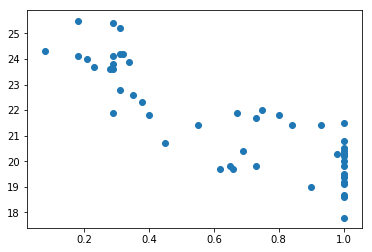

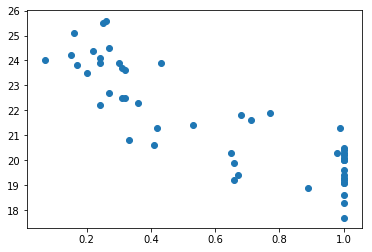

In [22]:
# Plot ACT 2017 and 2018 Participation Rates vs. Composite Scores
plt.scatter(x = final['2017_act_participation'], 
            y = final['2017_act_composite'])
plt.show()
plt.scatter(x = final['2018_act_participation'], 
            y = final['2018_act_composite'])
plt.show()

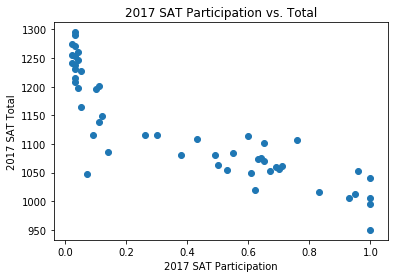

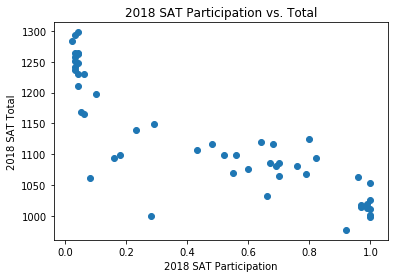

In [23]:
# Plot SAT 2017 and 2018 Participation Rates vs. Composite Scores
plt.scatter(x = final['2017_sat_participation'], 
            y = final['2017_sat_total'])
plt.title("2017 SAT Participation vs. Total")
plt.xlabel("2017 SAT Participation")
plt.ylabel("2017 SAT Total")
plt.show()
plt.scatter(x = final['2018_sat_participation'], 
            y = final['2018_sat_total'])
plt.title("2018 SAT Participation vs. Total")
plt.xlabel("2018 SAT Participation")
plt.ylabel("2018 SAT Total")
plt.show()

Observations:
- There appears to be an inverse relationship between particapation rate and total/composite score for both years (as the participation rate increases, the score decreases)

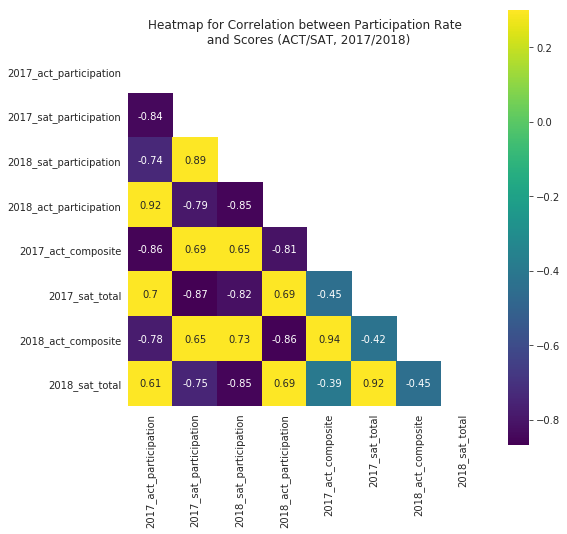

In [24]:
# Create correlation heatmap
# Reference: code is taken with minor modifcation from Matt Brehms (Principles of Data Visualization)

test = final.copy()[['state', 
                     '2017_act_participation', '2017_sat_participation',
                     '2018_sat_participation', '2018_act_participation', 
                     '2017_act_composite', '2017_sat_total',
                     '2018_act_composite', '2018_sat_total']]

# Establish size of figure.
plt.figure(figsize=(8,8))

corr = test.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # triu = upper triangle

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, cmap='viridis',square=True, annot=True)
plt.title("Heatmap for Correlation between Participation Rate \n and Scores (ACT/SAT, 2017/2018)");

Observations:
-  Positively Correlated (>0.89:
    - 2018 SAT Participation vs. 2017 SAT Participation (0.89)
    - 2018 ACT Participation vs. 2017 ACT Participation (0.92)
    - 2018 ACT Composite vs. 2017 ACT Composite (0.94)
    - 2018 SAT Total vs. 2017 SAT Total (0.92)
-  Negatively Correlated (<-0.84):
    - 2017 SAT Participation vs. 2017 ACT Participation (-0.84)
    - 2018 SAT Participation vs. 2017 ACT Participation (-0.85)
    - 2017 ACT Composite vs. 2017 ACT Participation (-.0.86)
    - 2018 ACT Composite vs. 2018 ACT Participation (-.0.86)
    - 2017 SAT Total vs. 2017 SAT Participation (-0.87)
    - 2018 SAT Total vs. 2018 SAT Participation (-0.85)

In [25]:
# Function to subplot histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))    
    fig, ax = plt.subplots(nrows = nrows, 
                           ncols = 2, 
                           figsize = (15, 5*nrows))
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):    # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i])          # set title for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])        # set labels for each subplot           

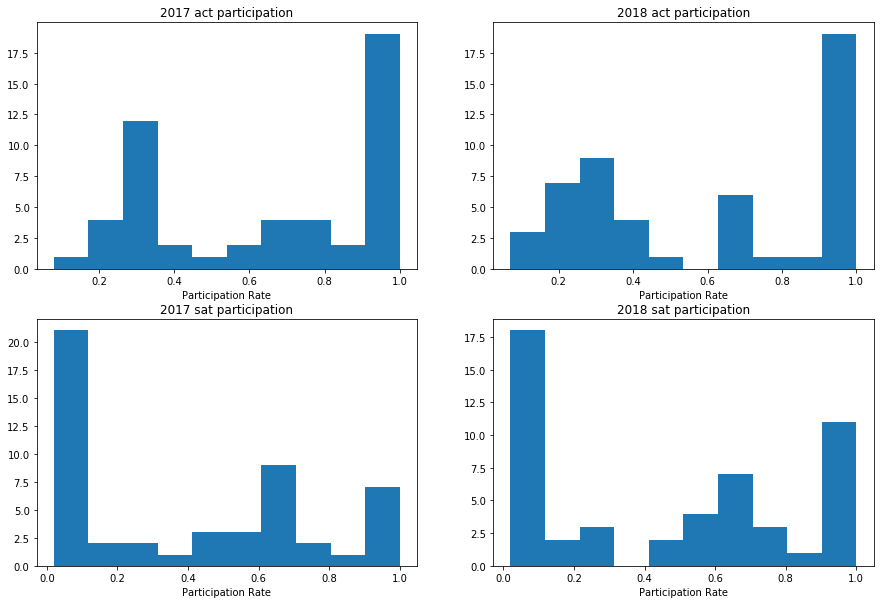

In [26]:
# Plot Participation rate histograms for SAT & ACT
list_of_columns = ['2017_act_participation', '2018_act_participation', '2017_sat_participation', '2018_sat_participation']
list_of_titles = [title.replace("_", " ") for title in list_of_columns]                   
subplot_histograms(final, list_of_columns, list_of_titles, ['Participation Rate' for _ in range(4)])

Observations:
-   ACT (2017 & 2018) have a high concentration of states in the 0.9 - 1.0 participation rate bin
-   SAT (2017 & 2018) have a high concentration of states in the 0.0 - 0.2 participation rate bin
-   Are these the same states???

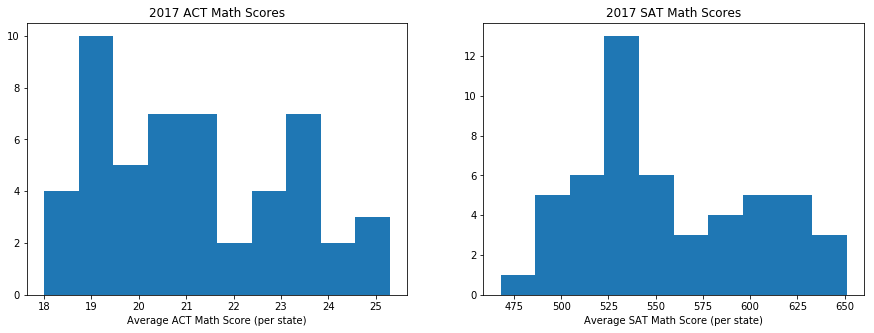

In [27]:
# Plot Math Scores for SAT & ACT (2017)
subplot_histograms(final, 
                   ['2017_act_math','2017_sat_math'],
                   ['2017 ACT Math Scores', '2017 SAT Math Scores'],
                   ['Average ACT Math Score (per state)', 'Average SAT Math Score (per state)'])

Observations:
-   With different scales on the x-axis it is hard to compare the ACT to the SAT
-   ACT Math: almost looks bimodal...around 19 and around 23.5
-   SAT Math: highest concentration of scores around 525

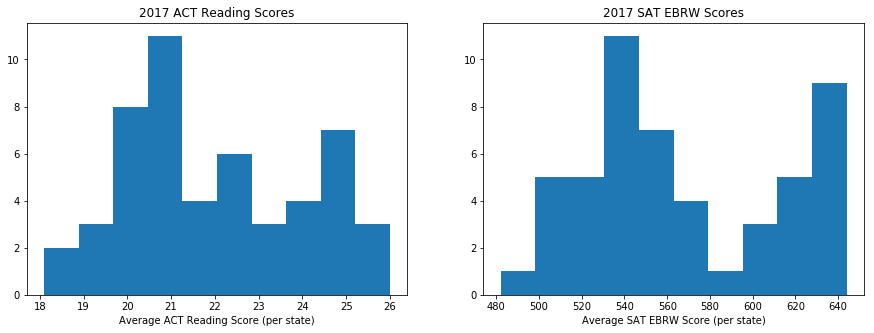

In [28]:
# Plot Verbal/Reading Scores for SAT & ACT (2017)
subplot_histograms(final, 
                   ['2017_act_reading','2017_sat_ebrw'],
                   ['2017 ACT Reading Scores', '2017 SAT EBRW Scores'],
                   ['Average ACT Reading Score (per state)', 'Average SAT EBRW Score (per state)'])

Observations:
-   With different scales on the x-axis it is hard to compare the ACT to the SAT
-   ACT Reading: almost looks bimodal...around 21 and around 25
-   SAT Reading: almost looks bimodal...around 540 and around 630

In [29]:
# Function to create scatter plot
def scatter_plot(df, x_col_name, y_col_name, title, x_label, y_label):
    plt.figure(figsize=(10, 5))
    plt.scatter(x = df[x_col_name], 
                y = df[y_col_name])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

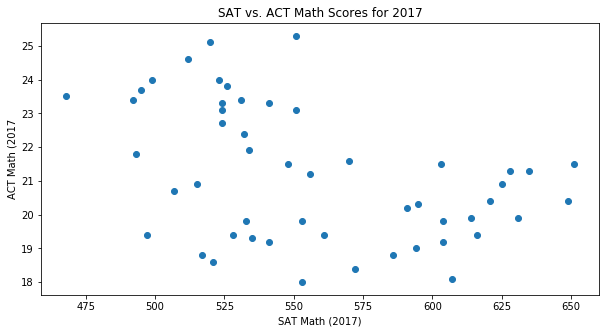

In [30]:
# Plot SAT 2017 and 2018 Participation Rates vs. Composite Scores
scatter_plot(final, '2017_sat_math', '2017_act_math', 'SAT vs. ACT Math Scores for 2017', 
             'SAT Math (2017)', 'ACT Math (2017')

In [31]:
final[['2017_sat_math','2017_act_math']].corr()

,2017_sat_math,2017_act_math
2017_sat_math,1.000000,-0.420456
2017_act_math,-0.420456,1.000000


Observations:
-   Correlation is slightly negative (-0.42), but not strong
-   This tells us that those states that scored well on SAT Math did not necessarily score well on ACT Math

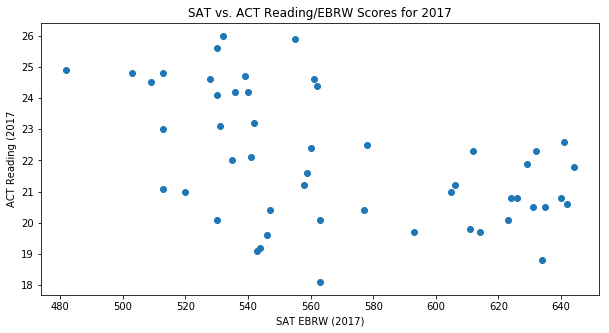

In [32]:
# SAT vs. ACT verbal/reading scores for 2017
scatter_plot(final, '2017_sat_ebrw', '2017_act_reading', 'SAT vs. ACT Reading/EBRW Scores for 2017', 
             'SAT EBRW (2017)', 'ACT Reading (2017')

In [33]:
final[['2017_sat_ebrw','2017_act_reading']].corr()

,2017_sat_ebrw,2017_act_reading
2017_sat_ebrw,1.000000,-0.488441
2017_act_reading,-0.488441,1.000000


Observations:
-   Correlation is slightly negative (-0.49), but not strong
-   This tells us that those states that scored well on SAT Reading did not necessarily score well on ACT Reading

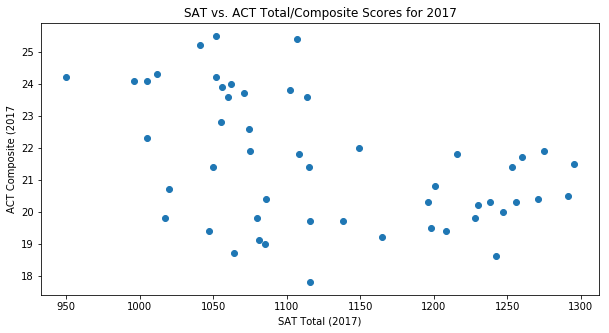

In [34]:
# SAT vs. ACT total/composite scores for 2017
scatter_plot(final, '2017_sat_total', '2017_act_composite', 'SAT vs. ACT Total/Composite Scores for 2017', 
             'SAT Total (2017)', 'ACT Composite (2017')

In [35]:
final[['2017_sat_total','2017_act_composite']].corr()

,2017_sat_total,2017_act_composite
2017_sat_total,1.00000,-0.44502
2017_act_composite,-0.44502,1.00000


Observations:
-   Correlation is slightly negative (-0.44), but not strong
-   Correlation is similar to that of the Reading and Math sections
-   This negative correlation is important for states to know if they are considering switching between tests as there are differences within the tests

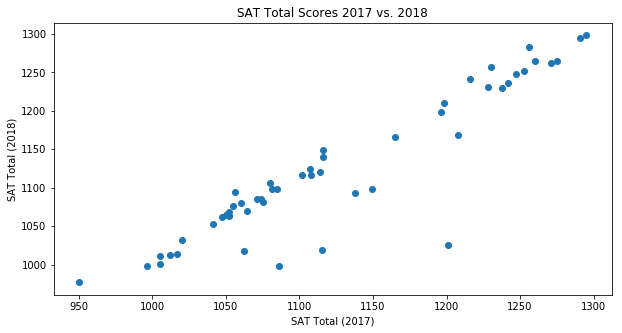

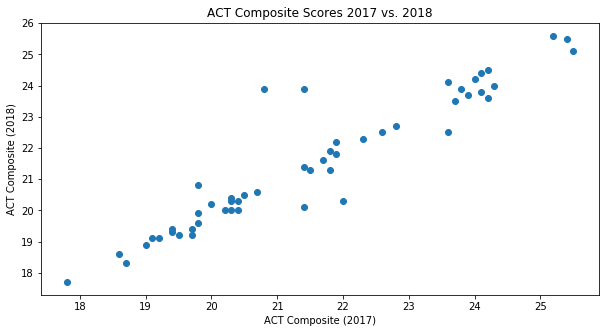

In [36]:
# Total scores for SAT 2017 vs. 2018
scatter_plot(final, '2017_sat_total', '2018_sat_total', 'SAT Total Scores 2017 vs. 2018', 
             'SAT Total (2017)', 'SAT Total (2018)')
plt.show()
# Composite scores for ACT 2017 vs. 2018
scatter_plot(final, '2017_act_composite', '2018_act_composite', 'ACT Composite Scores 2017 vs. 2018', 
             'ACT Composite (2017)', 'ACT Composite (2018)')
plt.show()

Observations:
-  SAT scores between 2017 and 2018 are highly positively correlated - those states that did well one year, did well the next as well (generally)
-   ACT scores between 2017 and 2018 are highly positively correlated - those states that did well one year, did well the next as well (generally)

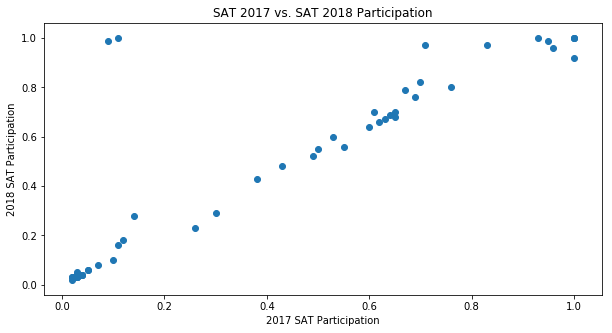

In [37]:
# SAT 2017 vs. SAT 2018 Participation
scatter_plot(final, '2017_sat_participation', '2018_sat_participation', 'SAT 2017 vs. SAT 2018 Participation', 
             '2017 SAT Participation', '2018 SAT Participation')
plt.show()

Observations:
- There is a very strong positive correlation between participation years over year
- There are two outliers where participation improved drastically between 2017 to 2018

In [38]:
# Look at the two outliers
final[(final['2017_sat_participation'] < 0.2) & (final['2018_sat_participation'] > 0.9)]

,state,2017_sat_participation,2017_sat_ebrw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
13,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,21.4,0.99,513,506,1019,0.43,23.9


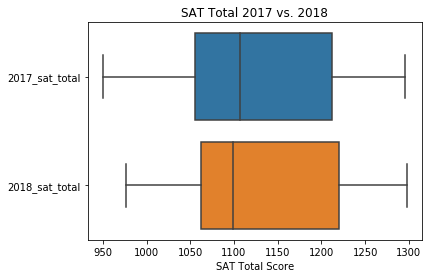

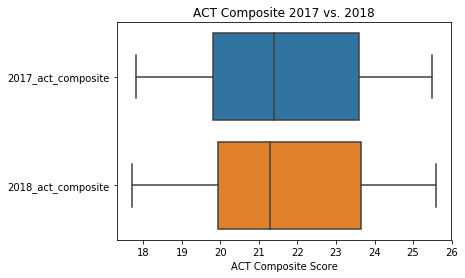

In [39]:
# SAT and ACT Totals
sns.boxplot(data=final[['2017_sat_total', '2018_sat_total']], orient='h').set_title('SAT Total 2017 vs. 2018')
plt.xlabel('SAT Total Score')
plt.show()

sns.boxplot(data=final[['2017_act_composite', '2018_act_composite']], orient='h').set_title('ACT Composite 2017 vs. 2018')
plt.xlabel('ACT Composite Score')
plt.show();

Observations:
-  Both tests have similar spreads for both years (similar IQR)

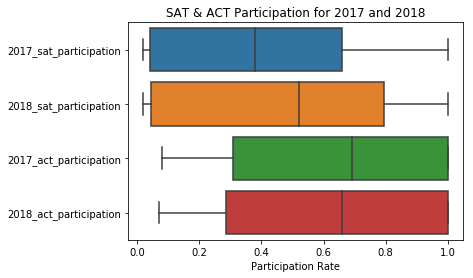

In [40]:
# SAT and ACT Participation for 2017 and 2018
sns.boxplot(data=final[['2017_sat_participation', '2018_sat_participation', '2017_act_participation', '2018_act_participation']], 
            orient='h').set_title('SAT & ACT Participation for 2017 and 2018')
plt.xlabel('Participation Rate');

Observation:
- SAT Participation Rate spread is lower than that of ACT
     -  SAT: ~ 0.0 to 0.6
     -  ACT: ~ 0.3 to 1.0

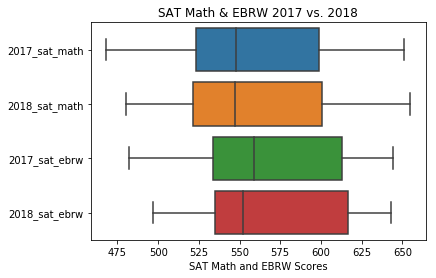

In [41]:
# SAT and Math & EBRW for 2017 and 2018
sns.boxplot(data=final[['2017_sat_math', '2018_sat_math', '2017_sat_ebrw', '2018_sat_ebrw']], 
            orient='h').set_title('SAT Math & EBRW 2017 vs. 2018')
plt.xlabel('SAT Math and EBRW Scores');

Observations:
-  Math distributions are slighly lower than EBRW Distribtions (people scoring better on EBRW generally)

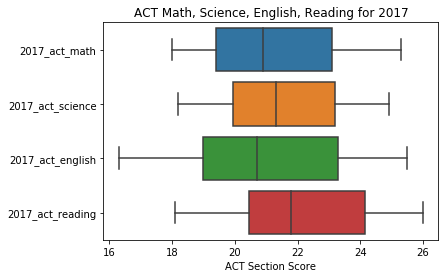

In [42]:
# ACT Math, Science, English, Reading for 2017
sns.boxplot(data=final[['2017_act_math', '2017_act_science', '2017_act_english', '2017_act_reading']], 
            orient='h').set_title('ACT Math, Science, English, Reading for 2017')
plt.xlabel('ACT Section Score');

Observations:
   - Students tend to do best on the ACT reading
   - Math, Science, and English sections have similar spreads, with science having the highest low

## Summarize Distributions

|Feature|Distribution|
|---|---|
|2017_act_participation|The 2017 ACT participation is skewed towards the right with two peaks - one around 0.3, and a larger one at 1.0. These peaks align with the IQR (0.31-1.0). The median falls in the middle of the IQR. All the outlies lie between 0.08 and 0.31|
|2017_act_english|The 2017 ACT English has both a similar mean and median (20.7/20.9) and has quite a few outliers that lie on either side of the IQR (16.3-19.0 and 23.3 to 25.5)|
|2017_act_math|The 2017 ACT Math shows a large group of scores between 18 and 21.5 and a smaller group of score sbetween 21.5 and 25. The median and mean both fall into the first group of scores (20.9/21.2)|
|2017_act_reading|The 2017 ACT Reading scores show three peaks - at 20.5, 22 and 24.5 with the larges peak being the lowest score (20.5 - the median Is 20.45) and the smallest peak being the middle (22.0 - the mean is 22.0)|
|2017_act_science|The 2017 ACT Science scores show a smaller IQR (19.95-23.2) as well as a smaller range of outlies (18.2-19.95 nad 23.2 to 24.9). The median (21.3) is near the middle, but falls to the left side of the IQR|
|2017_act_composite|The 2017 ACT Composite scores have a median (19.8) that fall right in the middle of IQR (17.8-21.4). The scores falling out of this raange follow a simialr range on both sides|
|2017_sat_participation|The 2017 SAT participation shows scores more toward the left, with la large peak at 0.0-0.1 (smaller peaks at 0.7 and 1.0). The IQR is skewed to the kleft at 0.04 -0.66 with all scores above 0.66 being outliers|
|2017_sat_ebrw|The SAT EBRW scores have a somewhat bimodal distribution where there is a paek at 540 and slightly smaller peak around 640. The median (533) falls more toward the left (larger peak at 540)|
|2017_sat_math|The SAT Math scores show the largest peak around 525 with many states falling in that area. The spread is centered with the median falling to the left side of the spread (599)|
|2017_sat_total|For the 2018 SAT totals while there is a somewhat equal range of outlies on either side of the spread (1055.5-12.12) the median (1107) falls to the left side of the spread|
|2018_act_participation|The 2018 ACT participation is skewed more to the right (similar distribution to 2017 ACT), with outliers only falling to the left of the IQR (outlies 0.0-0.3)|
|2018_act_composite|The 2018 ACT composite shows ane even spread  (19.95-23.65, centered in the middle between the max and the min, but the median is toward the left of the spread (21.3)|
|2018_sat_participation|The 2018 SAT participation is shifted more towards the left with a large peak at 0.0-0.1. The IQR of 2018 sat participation is larger than that of 2017 with outliers only falling into the 0.8-1.0 range|
|2018_sat_ebrw|The SAT EBRW scores show outlies on both sides of the spread, but less than in 2018 and the median is more to the left of the IQR|
|2018_sat_math|The 2018 SAT Math shows a very similar distribution to that of the 2017 SAT Math scores|
|2018_sat_total|The 2018 SAT totals shows a smaller range of outliers, but the merdian falls further to the left in the IQR|